## Observations and Insights 

The mice had the best outcomes w/ Capomulin and Ramocane.  
Their end max tumor volumes were still lower than other trials minimums showing significant difference from the other regimens. 
The 2 best drugs did have wide outcomes, but their outcomes were still better than other trials. 
I would run more statistical analysis upon why some mice didn't make it to the 45 count mark. 
There is something about the weight or size of the mouse that causes larger tumors.


In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#Gotta see what i'm working with before i can merge them...
#mouse_metadata.head(5)
#study_results.head(5)
#they have mouseid in column join there
# Combine the data into a single dataset
# Merge two dataframes using an outer join to include all data
MouseExtraMouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
MouseExtraMouse_df.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice in the DataFrame.
#count the number of unique mouse ID's in Mouse ID column
MouseCount = MouseExtraMouse_df["Mouse ID"].nunique()
#mousecount
print(f"There are {MouseCount} mice in this data set")


There are 249 mice in this data set


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint#### These instructions are bad...
#Better instructions
#Check to see if any mouse ID has been used more than once.
#Ok so there is a mouseID that has 2 separate results.  Gotta throw both of them out.
#The duplicate mouse is on the mousedf, use the Mouse ID and Time column, and find the mouse ID that comes up more than 1 time
duplicate_mouse=MouseExtraMouse_df.loc[MouseExtraMouse_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print(duplicate_mouse)
#The double counted mouse is g989


['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseg989 = MouseExtraMouse_df['Mouse ID']== "g989"
#print(mouseg989.head(10))
doublemouse = MouseExtraMouse_df[mouseg989]
doublemouse_df = pd.DataFrame(doublemouse)
doublemouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#drop the double counted mouse
#I went back and renamed the old sheet to extra mouse now that i know what's going on and the new mouse df
#is the old mouse df but insisde the mouse df look at the mouse id and if the id is the the duplicate mouse variable
#throw it out
mouse_df = MouseExtraMouse_df[MouseExtraMouse_df["Mouse ID"].isin(duplicate_mouse)== False]
mouse_df.head(25)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [8]:
# Checking the number of mice in the clean DataFrame.
mousecount = mouse_df["Mouse ID"].nunique()
print(f"There are {mousecount} mice in this data set")



There are 248 mice in this data set


In [9]:
#i'm coming back here to figure out how many mice/datya checks we have per regimen.
#I'm pulling out the data frame that i created already in summary stats and putting it here
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Group by regimen 
byregimen = mouse_df.groupby(['Drug Regimen'])
# The object returned is a "GroupBy" object and cannot be viewed normally...
# In order to be visualized, a data function must be used...
#byregimen.count().head()
#This has 230 rows in Capo, 178 in Ceftamin...
# I think this column is what i want to add to my data frame
byregimen["Mouse ID"].count().head()
#add this column to summary stats.
mouseid_df = pd.DataFrame(byregimen["Mouse ID"].count())
mouseid_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


## Summary Statistics

In [10]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#We're gonna make a data frame based on the Tumor Vol 3 Column
regimen_tumorvol_mean = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_tumorvol_median = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_tumorvol_std = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_tumorvol_var = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_tumorvol_sem = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

regimen_tumorvol_df = pd.DataFrame({
    "Number of Trials":mouseid_df["Mouse ID"],
    "Mean Tumor Vol (mm3)":regimen_tumorvol_mean,
    "Median Tumor Vol (mm3)":regimen_tumorvol_median,
    "Variance Tumor Vol (mm3)":regimen_tumorvol_var,
    "Std Dev Tumor Vol (mm3)":regimen_tumorvol_std,
    "SEM Tumor Vol (mm3)":regimen_tumorvol_sem,
})
regimen_tumorvol_df

regimen_tumorvol_df = pd.DataFrame(regimen_tumorvol_df)
regimen_tumorvol_df = regimen_tumorvol_df.reset_index()
regimen_tumorvol_df

# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Drug Regimen,Number of Trials,Mean Tumor Vol (mm3),Median Tumor Vol (mm3),Variance Tumor Vol (mm3),Std Dev Tumor Vol (mm3),SEM Tumor Vol (mm3)
0,Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,182,53.236507,51.818479,48.533355,6.966589,0.516398


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

## Bar Plots

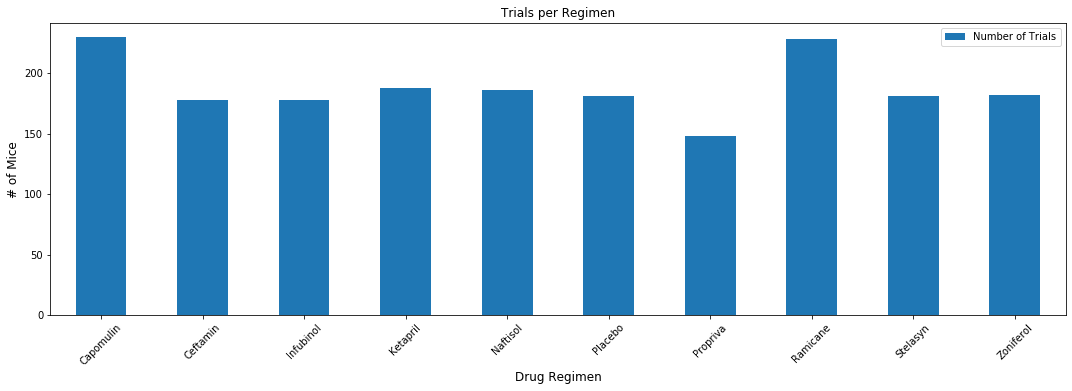

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#I am having trouble understanding what this is asking.  I think the x-axis is the drug regimens.
#The Y would be the number of mice per time point.... per time point i don't understand
#I'm gonna would w/ the number of mice. 
#Create a df w/ just what you're looking for
miceperregimen_df = regimen_tumorvol_df[["Drug Regimen","Number of Trials"]]
# I wanna make a bar chart of this df.
micepertrialbar = miceperregimen_df.plot(kind="bar", figsize=(15,5))
plt.title("Trials per Regimen")
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("# of Mice", fontsize=12)


plt.tight_layout()
micepertrialbar.set_xticklabels(miceperregimen_df["Drug Regimen"], rotation=45)

plt.show()


In [14]:
miceperregimen_df

,Drug Regimen,Number of Trials
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


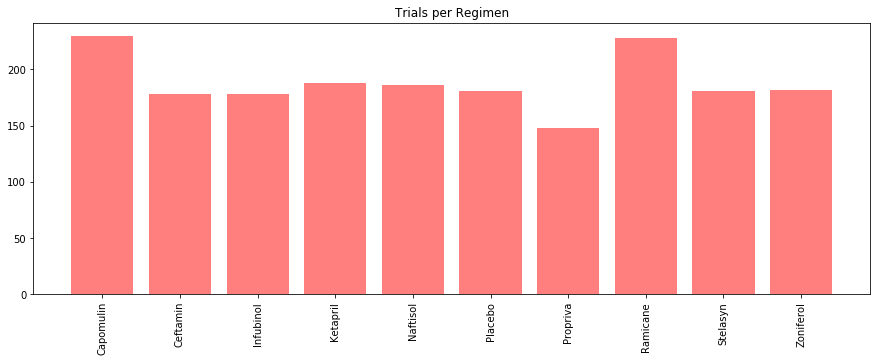

In [15]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(miceperregimen_df))
tick_locations = [value for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,5))
plt.bar(x_axis, miceperregimen_df["Number of Trials"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, miceperregimen_df["Drug Regimen"], rotation="vertical")
plt.title("Trials per Regimen")
plt.show()


In [16]:
#I have to create a df w/ number of females/males
MouseGender = mouse_df.groupby("Sex")["Mouse ID"].nunique()
MouseGender_df = pd.DataFrame(MouseGender)
MouseGender_df =MouseGender_df.reset_index()
MouseGender_df
genders = MouseGender_df["Sex"]
GendersCount = MouseGender_df["Mouse ID"]
MouseGender_df

,Sex,Mouse ID
0,Female,123
1,Male,125


## Pie Plots

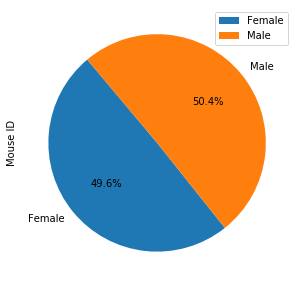

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = MouseGender_df["Sex"]
pandaspie = MouseGender_df.plot.pie(y = "Mouse ID", labels = labels,subplots = True, figsize=(5, 5), autopct = "%1.1f%%", startangle = 130)



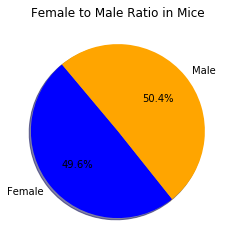

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = MouseGender_df["Sex"]
GendersCount = MouseGender_df["Mouse ID"]
colors = ["blue", "orange"]
explode = (0, 0)
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(GendersCount, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)
plt.title("Female to Male Ratio in Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Take the first DF and just look at the Tumor Volume at the last possible time. Time point = 45 
#Including final tumor volume of a mouse that only goes 5 days and comparing it to one that goes longer muddies the study.
# Remove time points less than 45.
mousetp45_df = mouse_df.loc[(mouse_df["Timepoint"] > 44)]
#ok now we have to groupby drug regimen to see how the avg tumor volume has done.
mousetp45groupedbyregimen = mousetp45_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mousetp45groupedbyregimen_df = pd.DataFrame(mousetp45groupedbyregimen)
MouseGender_df =MouseGender_df.reset_index()
mousetp45groupedbyregimen_df= mousetp45groupedbyregimen_df.sort_values(by ="Tumor Volume (mm3)", ascending = True)

#I just want the 4 best treatments, so sort by value sort ascending
mousetp45groupedbyregimen_df
#The top 4 drug regimens that lead to the smallest tumor volume at the last time point
#are Ramicane Capomulin Ceftamin Infubinol
#Create a table w/ just those 4 drugs and their tumor volumes
topfouregimens = mousetp45_df.loc[(mousetp45_df["Drug Regimen"] == "Ramicane")
                                     |(mousetp45_df["Drug Regimen"] == "Capomulin")
                                      |(mousetp45_df["Drug Regimen"] == "Ceftamin") 
                                       |(mousetp45_df["Drug Regimen"] == "Infubinol")]
topfouregimens.head(10)
 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1
104,u364,Capomulin,Male,18,17,45,31.023923,3


In [24]:
# and quantitatively determine if there are any potential outliers.
#Create a new data frame w/ just drug regiment and Tumor Volume. 
topfourregimens = topfouregimens[["Drug Regimen","Tumor Volume (mm3)"]]
topfourregimens = pd.DataFrame(topfourregimens)
topfourregimens_grouped = topfourregimens.groupby("Drug Regimen")["Tumor Volume (mm3)"]
topfourregimens_grouped.describe()
#Calculate the IQR 
lowerq = topfourregimens_grouped.describe()['25%']
upperq = topfourregimens_grouped.describe()['75%']
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# and quantitatively determine if there are any potential outliers.
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")




Values below Drug Regimen
Capomulin    20.704562
Ceftamin     52.293507
Infubinol    55.357776
Ramicane     19.690480
dtype: float64 could be outliers.
Values above Drug Regimen
Capomulin    51.832015
Ceftamin     76.667868
Infubinol    75.082244
Ramicane     49.799000
dtype: float64 could be outliers.


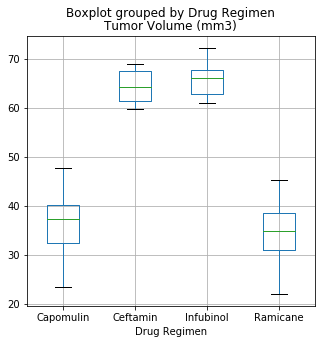

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(figsize=(5,5))
plt.suptitle('')
topfourregimens.boxplot(column=['Tumor Volume (mm3)'], by='Drug Regimen', ax=ax)

## Line and Scatter Plots

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Create df w/ just Capomulin
capomulin_df = mouse_df[mouse_df["Drug Regimen"]=="Capomulin"]
capomulinTimeChart_df = capomulin_df[["Mouse ID", "Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
capomulinTimeChart_df



,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,0,45.000000
11,s185,Capomulin,5,43.878496
12,s185,Capomulin,10,37.614948
13,s185,Capomulin,15,38.177232
14,s185,Capomulin,20,36.866876
...,...,...,...,...
440,i557,Capomulin,45,47.685963
1452,r157,Capomulin,0,45.000000
1453,r157,Capomulin,5,45.597064
1454,r157,Capomulin,10,46.059608


In [27]:
#grab a random mouse in the cleaned data frame randomly that was treated
randommouse = capomulinTimeChart_df['Mouse ID']
randommouse = (random.choice(randommouse))

randommouse_df = capomulinTimeChart_df[capomulinTimeChart_df["Mouse ID"]== (randommouse)]
randommouse_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,0,45.000000
11,s185,Capomulin,5,43.878496
12,s185,Capomulin,10,37.614948
13,s185,Capomulin,15,38.177232
14,s185,Capomulin,20,36.866876
15,s185,Capomulin,25,33.949940
16,s185,Capomulin,30,32.959671
17,s185,Capomulin,35,28.328531
18,s185,Capomulin,40,25.472143
19,s185,Capomulin,45,23.343598


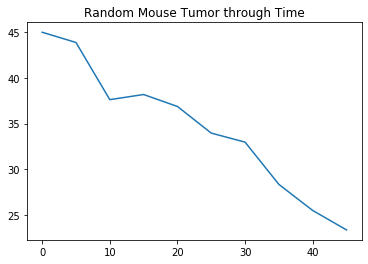

In [29]:
#Create the line chart
# Create our x_axis list

timeseries = randommouse_df['Timepoint'].to_list()
# Create our x_axis list
x_axis = timeseries
tumorvol = randommouse_df['Tumor Volume (mm3)'].to_list()
plt.plot(x_axis, tumorvol)
plt.title("Random Mouse Tumor through Time")
plt.show()

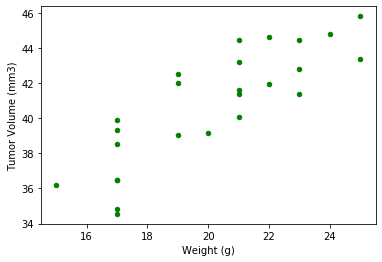

In [37]:
# # Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulinScatter_df = capomulin_df[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
groupedscatter = capomulinScatter_df.groupby(["Mouse ID"]).mean()

groupedscatter = groupedscatter.reset_index()


ax1 = groupedscatter.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)',c='green')











In [30]:
groupedscatter

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


## Correlation and Regression

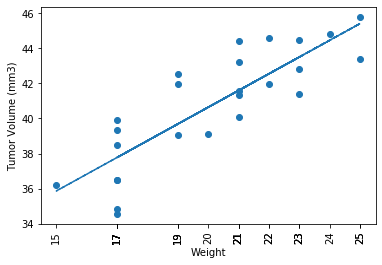

In [31]:
# Calculate the correlation coefficient and linear regression modelfor mouse weight and average tumor volume for the Capomulin regimen
# Perform a linear regression 
weight = groupedscatter.loc[:,"Weight (g)"]
tumorvolcap = groupedscatter.loc[:,"Tumor Volume (mm3)"]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(weight, tumorvolcap)
# Create equation of line to calculate predicted tumor vol
vc_fit = vc_slope * weight + vc_int
# Plot the linear model on top of scatter plot 


plt.scatter(weight,tumorvolcap)
plt.plot(weight,vc_fit,"--")
plt.xticks(weight, rotation=90)
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()